9


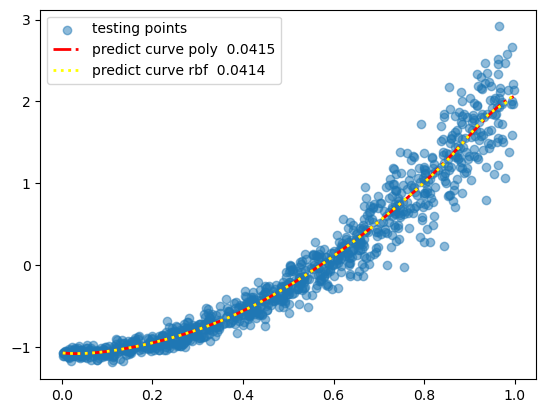

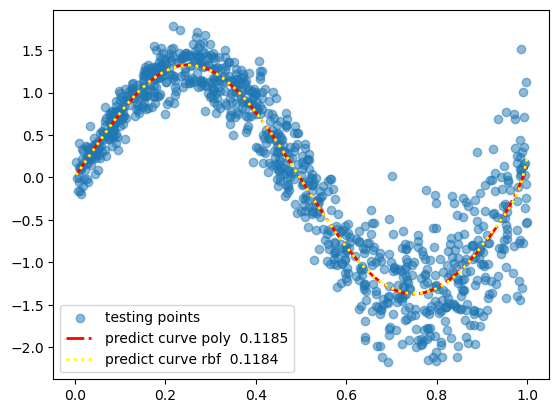

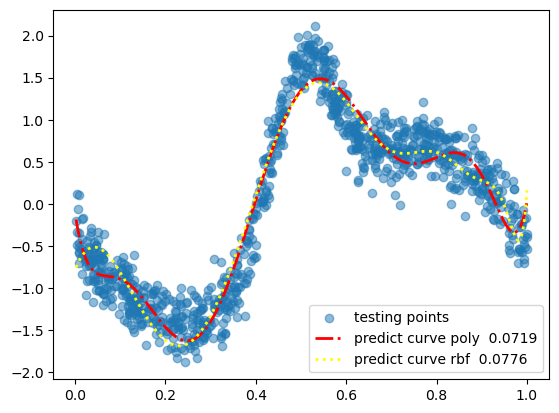

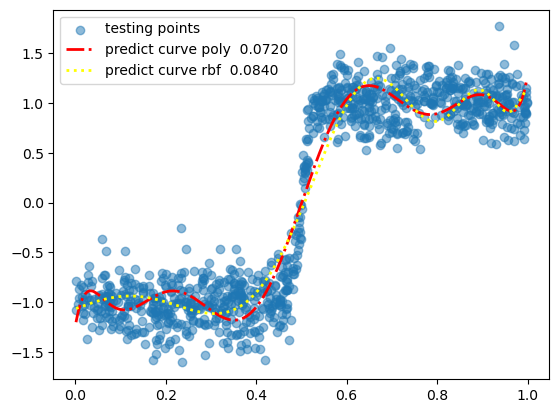

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# 多项式数据转化b
def poly_transformer(x, p):
    ret = np.array([])
    s = np.ones_like(x) 
    ret = np.append(ret, s)
    for i in range(p):
        i = i+1
        ret = np.append(ret, np.power(x, i))
    return ret.reshape((p+1, len(x))).T


# rbf数据转化
def rbf_transformer(x, p, s):
    ret = np.array([])
    s = np.ones_like(x)
    ret = np.append(ret, s)
    for i in range(p):
        i = i + 1
        s = np.exp(- (x - (i / (p + 1))/(2 * np.power(s, 2))))
        ret = np.append(ret, s)
    return ret.reshape((p+1, len(x))).T

### 数据集拟合
file_list = ['./dataset/dataset-a.csv', './dataset/dataset-b.csv', './dataset/dataset-c.csv', './dataset/dataset-d.csv']
p_list = np.linspace(1, 10, num=10, dtype=int)
s_list = np.arange(0.1, 1.1, step = 0.1)

p_t = p_list[8]
s_t = s_list[2]

print(p_t)

for i in file_list:
    
    data = pd.read_csv(i)
    
    # 切分数据，将测试数据排序
    trains_split = int(0.8 * len(data))
    x_train, y_train = data.loc[:trains_split-1, 'x'].to_numpy(), data.loc[:trains_split-1, 'y'].to_numpy()
    data_sorted = data.loc[trains_split:].sort_values('x', ascending=True).reset_index(drop=True)
    x_test, y_test = data_sorted.loc[:, 'x'], data_sorted.loc[:, 'y']


    # 多项式回归
    x_train_poly = poly_transformer(x_train, p_t)
    model_poly = LinearRegression()
    model_poly.fit(x_train_poly , y_train)
    x_test_poly = poly_transformer(x_test, p_t)
    y_pred_poly  = model_poly.predict(x_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    # rbf回归
    x_train_rbf = rbf_transformer(x_train, p_t, s_t)
    x_test_rbf = rbf_transformer(x_test, p_t, s_t)
    model_rbf = LinearRegression()
    model_rbf.fit(x_train_rbf, y_train)
    y_pred_rbf = model_rbf.predict(x_test_rbf)
    mse_rbf = mean_squared_error(y_test, y_pred_rbf)
    
    fig, ax = plt.subplots()
    ax.scatter(x_test, y_test, label="testing points", alpha=0.5)
    ax.plot(x_test, y_pred_poly, label=f"predict curve poly {mse_poly: 0.4f}",color="red", linewidth = 2 , linestyle='-.')
    ax.plot(x_test, y_pred_rbf, label=f"predict curve rbf {mse_rbf: 0.4f}",color="yellow", linewidth = 2 , linestyle=':')
    ax.legend()
    plt.show()